In [4]:
#pip install needed libraries for Google Colab when you re-connect
! pip install emoji
! pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=0a9c0002af0a1227ed747a4af7b74dd6823dd1d84f6fa2aeabf64bf79c2f5ff7
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 4.3 MB/s eta 0:00:00


In [66]:
! pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import praw
import os
import re
import nltk
import time
import random
import emoji
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim_models
import warnings
warnings.filterwarnings("ignore")

from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from string import punctuation
from string import punctuation
from collections import Counter, defaultdict
from wordcloud import WordCloud
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from reddit_key import api_key, api_key_secret

In [ ]:
user_agent = "example 1.0 by lucho"
reddit= praw.Reddit(
    client_id = api_key,
    client_secret= api_key_secret,
    user_agent = user_agent
)

In [ ]:
stock_names2 =['TSLA', 'Tesla', 'Tesla Inc.', 'Tesla Corporation',
               'LYFT', 'Lyft', 'Lyft Inc.', 'Lyft Corporation',
               'BBD', 'Bombardier', 'Bombardier Inc.',
               'F', 'Ford', 'Ford Motor', 'Ford Motor Company',
               'AAPL', 'Apple', 'Apple Inc.',
               'NVDA', 'NVIDIA', 'NVIDIA Corporation',
               'GOOGL', 'Alphabet', 'Alphabet Inc.', 'Google', 'Google Inc.',
               'AMZN', 'Amazon', 'Amazon.com', 'Amazon.com Inc.',
               'AMD', 'Advanced Micro Devices', 'Advanced Micro Devices Inc.',
               'GOOG', 'Alphabet', 'Alphabet Inc.', 'Google', 'Google Inc.',
               'ITUB', 'Itau Unibanco', 'Itau Unibanco Holding', 'Itau Unibanco Holding S.A.',
               'PLTR', 'Palantir Technologies', 'Palantir Technologies Inc.',
               'UBER', 'Uber', 'Uber Technologies', 'Uber Technologies Inc.',
               'CCL', 'Carnival', 'Carnival Corporation', 'Carnival Corporation & plc',
               'AMC', 'AMC Entertainment', 'AMC Entertainment Holdings', 'AMC Entertainment Holdings Inc.',
               'NIO', 'NIO', 'NIO Inc.',    'PYPL', 'PayPal', 'PayPal Holdings', 'PayPal Holdings Inc.',
               'SOFI', 'SoFi Technologies', 'SoFi Technologies Inc.',
               'LUMN', 'Lumen Technologies', 'Lumen Technologies Inc.',
               'PBR', 'Petroleo Brasileiro', 'Petroleo Brasileiro S.A.', 'Petrobras',
               'META', 'MetLife', 'MetLife Inc.',
               'BAC', 'Bank of America', 'Bank of America Corporation',
               'INTC', 'Intel', 'Intel Corporation',
               'CS', 'Credit Suisse', 'Credit Suisse Group',
               'Credit Suisse Group AG',
               'APE', 'AP Eagers', 'AP Eagers Limited']

In [ ]:
stock_names4 = ['TSLA', 'Tesla', 'Tesla Inc.', 'Tesla Corporation',
                'PLTR', 'Palantir', 'Palantir Technologies Inc.', 'Palantir Corporation',
                'F', 'Ford', 'Ford Motor', 'Ford Motor Company',
                'NVDA', 'Nvidia', 'Nvidia Corporation', 'AAPL', 'Apple', 'Apple Inc.',
                'AMZN', 'Amazon', 'Amazon.com Inc.', 'AMD', 'Advanced Micro Devices', 
                'GOOGL', 'Google', 'Alphabet Inc.',
                'NU', 'Northeast Utilities', 'ITUB',
                'Itau Unibanco Holding SA',
                'GOOG', 'Uber', 'Uber Technologies Inc.',
                'Uber Corporation',
                'MSFT', 'Microsoft', 'Microsoft Corporation',
                'NIO', 'Nio', 'Nio Inc.', 'Nio Corporation',
                'AMC', 'AMC Entertainment', 'AMC Entertainment Holdings Inc.',
                'CCL', 'Carnival', 'Carnival Corporation',
                'LUMN', 'Lumen', 'Lumen Technologies Inc.',
                'LYFT', 'Lyft', 'Lyft Inc.', 'Lyft Corporation',
                'SNAP', 'Snap', 'Snap Inc.',
                'BAC', 'Bank of America', 'Bank of America Corporation',
                'SOFI', 'SoFi', 'SoFi Technologies Inc.',
                'ABEV', 'AmBev', 'AmBev SA',
                'BBD', 'Bombardier', 'Bombardier Inc.',
                'INTC', 'Intel', 'Intel Corporation',
                'AI', 'Arlington', 'Arlington Asset Investment Corp.',
                'CS', 'Credit Suisse', 'Credit Suisse Group AG',
                'APE', 'Apeel', 'Apeel Sciences Inc.',
                'META', 'Metamaterial', 'Metamaterial Inc.',
                'COIN', 'Coinbase', 'Coinbase Global Inc.',
                'T', 'AT&T', 'AT&T Inc.',
                'AFRM', 'Affirm', 'Affirm Holdings Inc.',
                'SWN', 'Southwestern', 'Southwestern Energy Company',
                'CLF', 'Cleveland', 'Cleveland-Cliffs Inc.', 
                'DNA', 'Sphereon', 'Sphere 3D Corp.', 'GOLD',
                'Barrick', 'Barrick Gold Corporation',
                'GRAB', 'Grab', 'Grab Holdings Inc.',
                'CSCO', 'Cisco', 'Cisco Systems Inc.',
                'PYPL', 'PayPal', 'PayPal Holdings Inc.',
                'SHOP', 'Shopify', 'Shopify Inc.',
                'CMCSA', 'Comcast', 'Comcast Corporation',
                'LCID', 'Lucid', 'Lucid Group Inc.',
                'BTG', 'B2Gold', 'B2Gold Corp.',
                'KO', 'Coca-Cola', 'The Coca-Cola Company',
                'PFE', 'Pfizer', 'Pfizer Inc.',
                'AAL', 'American Airlines', 'American Airlines Group Inc.',
                'BTU', 'Peabody', 'Peabody Energy Corporation',
                'RIVN', 'Rivian', 'Rivian Automotive Inc.',
                'WFC', 'Wells Fargo', 'Wells Fargo & Company',
                'C', 'Citigroup', 'Citigroup Inc.',
                'PBR', 'Petrobras', 'Petroleo Brasileiro SA']

In [ ]:
subreddits = ['stockmarket', 'investing', 'wallstreetbets',
              'Wallstreetbetsnew','WallStreetbetsELITE',
              'stocks','StockMarket','investing',
              'SPACs', 'options','Daytrading','Shortsqueeze',
              'SqueezePlays']

In [ ]:
# Define regular expression pattern to match stock symbols
symbol_pattern = re.compile(r'\b(' + '|'.join(stock_names4) + r')\b', re.IGNORECASE)

data = {}
seen_headlines = set()
start_time = time.time()

for subreddit in subreddits:
    for post_type in ['hot', 'new']:
        for submission in reddit.subreddit(subreddit).__getattribute__(post_type)(limit=None):
            if submission.title not in seen_headlines and symbol_pattern.search(submission.title):
                seen_headlines.add(submission.title)
                headline_data = {
                    'headline': submission.title,
                    'headline_score': submission.score,
                    'stock_name': symbol_pattern.search(submission.title).group(0),
                    'subreddit_name': subreddit,
                    'comments': []
                }
                submission.comments.replace_more(limit=0)
                comment_counter = 0
                for comment in submission.comments.list():
                    if comment.body and comment.score:
                        headline_data['comments'].append({
                            'comment': comment.body,
                            'comment_score': comment.score
                        })
                        comment_counter += 1
                        if comment_counter >= 50:
                            break
                data[submission.title] = headline_data

end_time = time.time()
run_time = end_time - start_time
print(f"Code run time: {run_time} seconds")


Code run time: 2513.3156411647797 seconds


In [ ]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(data, orient='index')


In [ ]:
df = df.reset_index(drop=True)
df

headline  headline_score  \
0     Al Gore’s Firm Sells Alibaba Stock, TSMC, and ...              81   
1         Tesla trade based on it's own historical data              10   
2                         What SHOP Won't Do – Probably               4   
3     OpenAI was revealed to have bought the AI.com ...               0   
4            META Summarized News for the week [Feb 19]               3   
...                                                 ...             ...   
1101  $APRN going to $15+ soon. Don't be bagholding ...              63   
1102  Joseph Sandberg isn't going to rugpull retail ...              28   
1103  People say fundamentally, the $BBBY play hasn'...              39   
1104  $BBBY on Reg Sho. "Volume has been way too hig...              92   
1105  $ENDP (maker of Plan B pill) looks like its ab...               5   

     stock_name subreddit_name  \
0       Shopify    stockmarket   
1         Tesla    stockmarket   
2          SHOP    stockmarket   
3            AI    stockmarket   
4          META    stockmarket   
...         ...            ...   
1101          t   SqueezePlays   
1102          t   SqueezePlays   
1103          t   SqueezePlays   
1104          t   SqueezePlays   
1105          t   SqueezePlays   

                                               comments  
0     [{'comment': 'Shopify was able to add more tha...  
1     [{'comment': 'Are sure you did not write a ver...  
2     [{'comment': 'This looks like a great way to a...  
3     [{'comment': 'I feel like the ai has signed it...  
4                                                    []  
...                                                 ...  
1101  [{'comment': 'Cashed out at $6.20 today, is it...  
1102  [{'comment': '🚀🚀 squeezes coming.. people will...  
1103  [{'comment': 'It’ll probably get pumped slight...  
1104  [{'comment': 'Per u/emlerith: "No shorting and...  
1105       [{'comment': 'Bullish', 'comment_score': 1}]  

[1106 rows x 5 columns]

Filtering spam and moderator comments

In [ ]:
# Create an empty dictionary to store the comments and their frequency
comment_freq = {}

# Loop through all comments in the list of lists
for comments in df['comments']:
    for comment in comments:
        # Convert the comment dictionary to a tuple to make it hashable
        comment_tuple = tuple(comment.items())
        
        # Check if the comment is already in the dictionary
        if comment_tuple in comment_freq:
            # If it is, increment the frequency by 1
            comment_freq[comment_tuple] += 1
        else:
            # If it is not, add the comment to the dictionary with a frequency of 1
            comment_freq[comment_tuple] = 1

# Sort the comments by frequency in descending order
sorted_comments = sorted(comment_freq.items(), key=lambda x: x[1], reverse=True)

# Print the comments and their frequencies
for comment, freq in sorted_comments:
    print(comment, freq)


(('comment', 'Please report anyone selling T-Shirts.\nRead [this guide](https://www.reddit.com/user/Someoneman/comments/ij0rwo/tips_on_how_to_recognize_spambots/) for how to recognize these scammers.\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Wallstreetbetsnew) if you have any questions or concerns.*'), ('comment_score', 1)) 54
(('comment', '[deleted]'), ('comment_score', 1)) 48
(('comment', "Hey, if you haven't already, please reply to this comment with your positions and what led you to enter or exit them!\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/wallstreetbets) if you have any questions or concerns.*"), ('comment_score', 1)) 27
(('comment', '[deleted]'), ('comment_score', 2)) 25
(('comment', "Hi! I'm QualityVote, and I'm here to give YOU the user some control over YOUR sub! \n\nIf the post above cont

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
with open('spam_comments.txt', 'r',encoding='utf-8') as f:
        s_comments = [line.strip() for line in f.readlines()]


In [ ]:
spam_list_comments = [s_comments]



In [ ]:
# Create an empty dictionary to store the comments and their frequency
comment_freq = {}

# Loop through all comments in the list of lists
for comments in df['comments']:
    for comment in comments:
        # Convert the comment dictionary to a tuple to make it hashable
        comment_tuple = tuple(comment.items())
        
        # Check if the comment is already in the dictionary
        if comment_tuple in comment_freq:
            # If it is, increment the frequency by 1
            comment_freq[comment_tuple] += 1
        else:
            # If it is not, add the comment to the dictionary with a frequency of 1
            comment_freq[comment_tuple] = 1

# Replace comments with frequency higher than 15 or in the spam list, or that contain "\n**User Report**| | | |" with an empty string
for i, comments in enumerate(df['comments']):
    for j, comment in enumerate(comments):
        # Convert the comment dictionary to a tuple to make it hashable
        comment_tuple = tuple(comment.items())
        
        # Check if the comment has a frequency higher than 15, is in the spam list, or contains "\n**User Report**| | | |"
        if comment_freq[comment_tuple] > 15 or [comment] in spam_list_comments or "\n**User Report**| | | |" in [comment]:
            # If it does, replace the comment with an empty string
            df['comments'][i][j] = " "

# Print the updated comments
print(df['comments'])



0       [{'comment': 'Shopify was able to add more tha...
1       [{'comment': 'Are sure you did not write a ver...
2       [{'comment': 'This looks like a great way to a...
3       [{'comment': 'I feel like the ai has signed it...
4                                                      []
                              ...                        
1101    [{'comment': 'Cashed out at $6.20 today, is it...
1102    [{'comment': '🚀🚀 squeezes coming.. people will...
1103    [{'comment': 'It’ll probably get pumped slight...
1104    [{'comment': 'Per u/emlerith: "No shorting and...
1105         [{'comment': 'Bullish', 'comment_score': 1}]
Name: comments, Length: 1106, dtype: object


In [ ]:
#number of comments users reported as comment or post already seen in the past, some contain commentary or opinions 
num_reports = 0

for comments in df['comments']:
    for comment in comments:
        if "**User Report**" in str(comment):
            num_reports += 1
            

print(num_reports)



177


In [ ]:
#total number of comments found in all subreddits/posts
num_comments = 0
for comments in df['comments']:
    num_comments += len(comments)
print(num_comments)

21281


In [ ]:
df.to_csv('reddit_data.csv', index_label=None, encoding='utf-8')

*****

# checkpoint- Data pulled and spam comments cleaned


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
data = pd.read_csv("/content/drive/My Drive/reddit_data_updated.csv", header=0)
#data = pd.DataFrame(data)
print(data.shape)
data.head()

(1106, 6)


Unnamed: 0                                           headline  \
0           0  Al Gore’s Firm Sells Alibaba Stock, TSMC, and ...   
1           1      Tesla trade based on it's own historical data   
2           2                      What SHOP Won't Do – Probably   
3           3  OpenAI was revealed to have bought the AI.com ...   
4           4         META Summarized News for the week [Feb 19]   

   headline_score stock_name subreddit_name  \
0              81    Shopify    stockmarket   
1              10      Tesla    stockmarket   
2               4       SHOP    stockmarket   
3               0         AI    stockmarket   
4               3       META    stockmarket   

                                            comments  
0  [{'comment': 'Shopify was able to add more tha...  
1  [{'comment': 'Are sure you did not write a ver...  
2  [{'comment': "This looks like a great way to a...  
3  [{'comment': "I feel like the ai has signed it...  
4                                                 []

In [13]:
# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
add_stopwords = ['comment', 'comment_score','commentscore','comment score']
sw = stopwords.words("english")
#sw.extend(new_stopwords)

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

#find the count of emojis within the dataframe
def contains_emoji(s):
    s = str(s)
    emojis = [ch for ch in s if emoji.is_emoji(ch)]
    return(len(emojis) > 0)

#remove the stop workds from the dataframe
def remove_stop(tokens) :
    stop_words = set(stopwords.words("english"))
    stop_words.update(add_stopwords)
    return [word for word in tokens if word.lower() not in stop_words]
 
#remove the punctuation from the dataframe
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

#create the tokens by splitting on whitespace
def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    return re.split(whitespace_pattern, text)

#defind the function for preparing the data for the pipeline
def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)

In [14]:
#apply the pipeline to the reddit dataframe
reddit_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

#create the tokens column and the number of tokens per column
data["tokens"] = data["comments"].apply(prepare,pipeline= reddit_pipeline)
data["num_tokens"] = data["tokens"].map(len) 
data['has_emoji'] = data["comments"].apply(contains_emoji)
data.head()

Unnamed: 0                                           headline  \
0           0  Al Gore’s Firm Sells Alibaba Stock, TSMC, and ...   
1           1      Tesla trade based on it's own historical data   
2           2                      What SHOP Won't Do – Probably   
3           3  OpenAI was revealed to have bought the AI.com ...   
4           4         META Summarized News for the week [Feb 19]   

   headline_score stock_name subreddit_name  \
0              81    Shopify    stockmarket   
1              10      Tesla    stockmarket   
2               4       SHOP    stockmarket   
3               0         AI    stockmarket   
4               3       META    stockmarket   

                                            comments  \
0  [{'comment': 'Shopify was able to add more tha...   
1  [{'comment': 'Are sure you did not write a ver...   
2  [{'comment': "This looks like a great way to a...   
3  [{'comment': "I feel like the ai has signed it...   
4                                                 []   

                                              tokens  num_tokens  has_emoji  
0  [shopify, able, add, 100, million, cash, holdi...         188      False  
1  [sure, write, vertical, call, spread, instead,...         435      False  
2  [looks, like, great, way, analyze, stock, sell...         124      False  
3  [feel, like, ai, signed, reddit, account, post...          42      False  
4                                                 []           1      False

In [15]:
#create the descriptive statistics function
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """
    total_types = []
    true_total = []
    num_tokens = 0
    num_unique_tokens = 0
    lexical_diversity = 0.0
    num_characters = 0

    #get unique list of tokens
    for token in tokens:
        #print(token)
        for i in token:
            true_total.append(i)
            num_tokens += 1
            if i in total_types:
                pass
            else:
                total_types.append(i)
                num_unique_tokens += 1
            for character in i:
                num_characters +=1
                
    lexical_diversity = round(num_unique_tokens / num_tokens , 3)
                
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")    

    #collect the 5 most common tokens
    counter_list = Counter(true_total)
    top_5 = counter_list.most_common(5)
    print(top_5)

    return([num_tokens, num_unique_tokens,lexical_diversity,num_characters])

In [16]:
#return the descriptive stats for the reddit data (tokens column)
descriptive_stats(data['tokens'])

There are 364556 tokens in the data.
There are 32426 unique tokens in the data.
There are 2125542 characters in the data.
The lexical diversity is 0.089 in the data.
[('1', 7691), ('2', 4387), ('like', 2590), ('3', 2433), ('would', 1781)]


[364556, 32426, 0.089, 2125542]

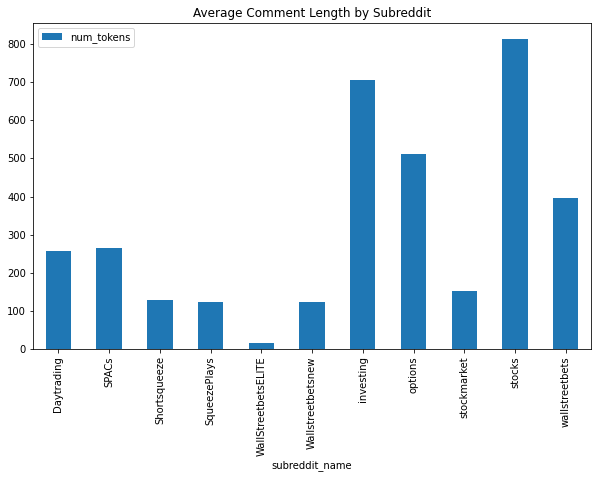

In [18]:
#view the mean wordcount by subreddit
%matplotlib inline
data.groupby('subreddit_name').agg({'num_tokens': 'mean'}).plot.bar(figsize=(10,6), title = "Average Comment Length by Subreddit")

#### Wordcloud build

##### create the wordcloud function

In [33]:
#create word clouds by subreddit
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [34]:
#udpated count_words function that removes numbers 1 -10, so that wordclouds are more intuitive to the words being used
def count_words(df, column='tokens', preprocess=None, min_freq=2):
    #process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        #remove tokens that are numbers 1 through 10
        tokens = [t for t in tokens if not (t.isdigit() and 1 <= int(t) <= 10)]
        counter.update(tokens)

    #create counter and run through all data
    counter = Counter()
    df[column].map(update)

    #transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'

    return freq_df.sort_values('freq', ascending=False)

##### wordcloud data prep (create individual df's by subreddit)

In [35]:
#create the total reddit wordcloud
reddit_cloud = count_words(data)

#create individual subreddit dataframes
df_wallstreetbets = data[data['subreddit_name'] == 'wallstreetbets'].copy()
df_stockmarket = data[data['subreddit_name'] == 'stockmarket'].copy()
df_daytrading = data[data['subreddit_name'] == 'Daytrading'].copy()
df_spacs = data[data['subreddit_name'] == 'SPACs'].copy()
df_shortsqueeze = data[data['subreddit_name'] == 'Shortsqueeze'].copy()
df_squeezeplays= data[data['subreddit_name'] == 'SqueezePlays'].copy()
df_wallstbets_elite = data[data['subreddit_name'] == 'WallStreetbetsELITE'].copy()
df_wallstreetbets_new = data[data['subreddit_name'] == 'Wallstreetbetsnew'].copy()
df_investing= data[data['subreddit_name'] == 'investing'].copy()
df_options = data[data['subreddit_name'] == 'options'].copy()
df_stocks = data[data['subreddit_name'] == 'stocks'].copy()

#create the count of words by each subreddit
wallst_cloud = count_words(df_wallstreetbets)
stockmk_cloud = count_words(df_stockmarket)
daytrade_cloud = count_words(df_daytrading)
spacs_cloud = count_words(df_spacs)
shortsqueeze_cloud = count_words(df_shortsqueeze)
squeezeplays_cloud = count_words(df_squeezeplays)
wallstbets_elite_cloud = count_words(df_wallstbets_elite)
wallstreetbets_new_cloud = count_words(df_wallstreetbets_new)
investing_cloud = count_words(df_investing)
options_cloud = count_words(df_options)
stocks_cloud = count_words(df_stocks)

In [45]:
#stocks_cloud.head()

##### Unique wordclouds by subreddit
Note: The first wordcloud is the entire dataframe, and the next two are the subreddits that have the most and the least length of tokens in their comments. 

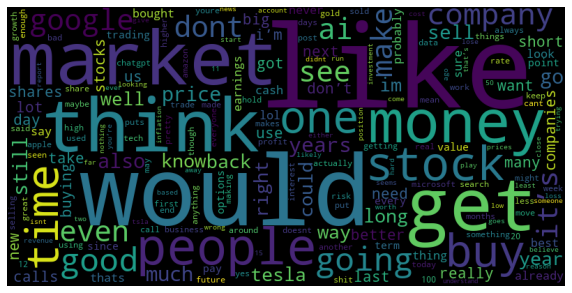

In [37]:
#make the wordcloud larger for better vizability (all subreddits included)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(reddit_cloud['freq'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

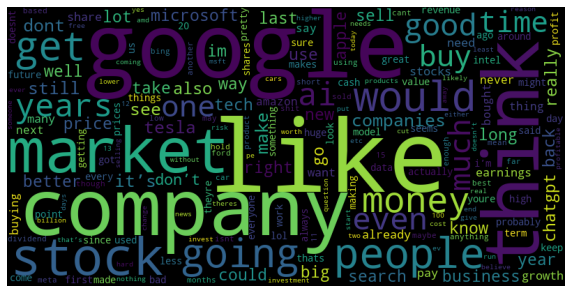

In [38]:
#stocks - most number of words used
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(stocks_cloud['freq'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

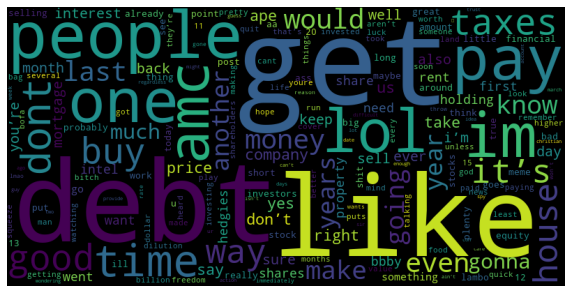

In [39]:
#wallstreetbets_elite - fewest number of words used
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(wallstbets_elite_cloud['freq'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

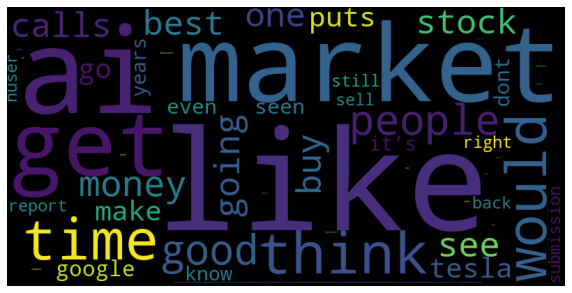

In [40]:
#wallstreetbets wordcloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(wallst_cloud['freq'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

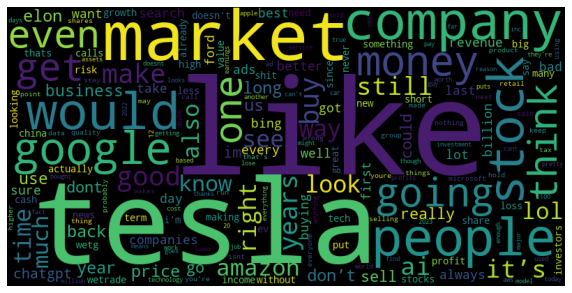

In [41]:
#stockmarket wordcloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(stockmk_cloud['freq'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

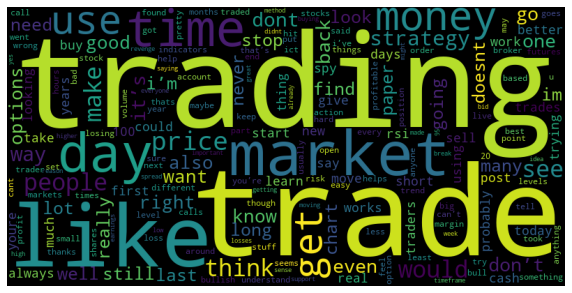

In [42]:
#daytrade wordcloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(daytrade_cloud['freq'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

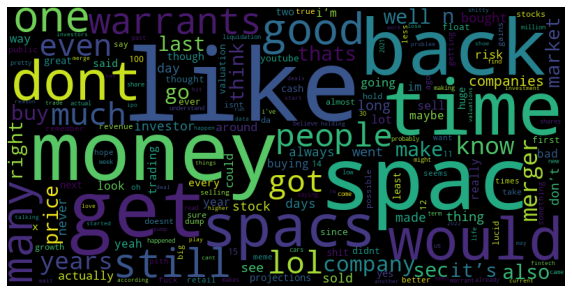

In [43]:
#spacs wordcloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(spacs_cloud ['freq'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

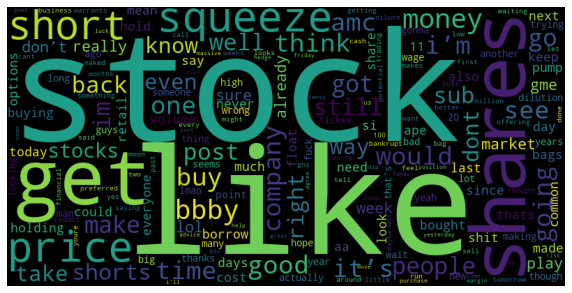

In [44]:
#shortsqueeze wordcloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(shortsqueeze_cloud['freq'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

### Naive Bayes Model:

#### Naive Bayes Data Prep

In [117]:
#create a tokens variable from the cleaned tokens from the data dataframe and store to list
tokens = data['tokens'].tolist()

#create a flat list to decouple the list of lists
flat_list = []

#iterate through the token list and append flat list
for sublist in tokens:
    flat_list.extend(sublist)

#reassign teh flat_list variable to the token_list variable
token_list = flat_list

In [118]:
def conv_features(text,fw) :
    """Given some text, this returns a dictionary holding the
       feature words.
       
       Args: 
            * text: a piece of text in a continuous string. Assumes
            text has been cleaned and case folded.
            * fw: the *feature words* that we're considering. A word 
            in `text` must be in fw in order to be returned. This 
            prevents us from considering very rarely occurring words.
        
       Returns: 
            A dictionary with the words in `text` that appear in `fw`. 
            Words are only counted once. 
            If `text` were "quick quick brown fox" and `fw` = {'quick','fox','jumps'},
            then this would return a dictionary of 
            {'quick' : True,
             'fox' :    True}
    """
    result = {word: True for word in text if word in fw}
              #word in text.split() for word in fw}
    return result

#conv_features(tokenlist, feature_words)

In [119]:
#iterate through the convetion_df.token column and assign to list
for tokenlist in data.tokens.tolist():
    break

In [120]:
#create a frequency list by token and establish the word cutoff limit
word_dist = nltk.FreqDist(token_list)
word_cutoff = 5

#create the list of words
feature_words = set()
for word, count in word_dist.items() :
    if count > word_cutoff :
        feature_words.add(word)

#view the number of features to be included in the Naive Bayes Model     
print(f"With a word cutoff of {word_cutoff}, we have {len(feature_words)} as features in the model.")

With a word cutoff of 5, we have 6012 as features in the model.


In [121]:
#apply the conv_features function the our token list and feature workds
conv_features(tokenlist, feature_words)

{'shopify': True,
 'able': True,
 'add': True,
 '100': True,
 'million': True,
 'cash': True,
 'holdings': True,
 'operating': True,
 'income': True,
 'billion': True,
 '18': True,
 'truth': True,
 '12': True,
 'fund': True,
 'doesn’t': True,
 'appear': True,
 'performing': True,
 'well': True,
 'honestly': True,
 'can’t': True,
 'figure': True,
 'even': True,
 'trying': True,
 'accomplish': True,
 'nnhow': True,
 'schwab': True,
 'saving': True,
 'world': True,
 'help': True,
 'future': True,
 'look': True,
 'like': True,
 'positioning': True,
 'optimal': True,
 'returns': True,
 'guess': True,
 'don’t': True,
 'know': True,
 'expected': True,
 'i’d': True,
 'expect': True,
 'operate': True,
 'back': True,
 'room': True,
 'political': True,
 'favor': True,
 'basis': True,
 'you’d': True,
 'pick': True,
 'politician': True,
 'manage': True,
 'rather': True,
 'bottom': True,
 'macro': True,
 'knows': True,
 '7': True,
 'ccp': True,
 'rules': True,
 'china': True,
 'iron': True,
 'touchi

In [122]:
#create the features column 
data['features'] = data["tokens"].apply(conv_features,fw=feature_words)
print(data.shape)
data.head()

(1106, 10)


Unnamed: 0                                           headline  \
0           0  Al Gore’s Firm Sells Alibaba Stock, TSMC, and ...   
1           1      Tesla trade based on it's own historical data   
2           2                      What SHOP Won't Do – Probably   
3           3  OpenAI was revealed to have bought the AI.com ...   
4           4         META Summarized News for the week [Feb 19]   

   headline_score stock_name subreddit_name  \
0              81    Shopify    stockmarket   
1              10      Tesla    stockmarket   
2               4       SHOP    stockmarket   
3               0         AI    stockmarket   
4               3       META    stockmarket   

                                            comments  \
0  [{'comment': 'Shopify was able to add more tha...   
1  [{'comment': 'Are sure you did not write a ver...   
2  [{'comment': "This looks like a great way to a...   
3  [{'comment': "I feel like the ai has signed it...   
4                                                 []   

                                              tokens  num_tokens  has_emoji  \
0  [shopify, able, add, 100, million, cash, holdi...         188      False   
1  [sure, write, vertical, call, spread, instead,...         435      False   
2  [looks, like, great, way, analyze, stock, sell...         124      False   
3  [feel, like, ai, signed, reddit, account, post...          42      False   
4                                                 []           1      False   

                                            features  
0  {'shopify': True, 'able': True, 'add': True, '...  
1  {'sure': True, 'write': True, 'vertical': True...  
2  {'looks': True, 'like': True, 'great': True, '...  
3  {'feel': True, 'like': True, 'ai': True, 'sign...  
4                                         {'': True}

In [123]:
#create the features sets list
feature_sets = []

#iterate through the f and collect the features and subreddit of each 
for i in range(data.shape[0]):
    feature_sets.append((data.iloc[i,9], data.iloc[i,4]))

In [124]:
#feature_sets

#### Naive Bayes Model

In [125]:
#shuffle the feature_sets and establish test size for test/training
random.seed(1234)
random.shuffle(feature_sets)

test_size = 300

In [126]:
from nltk import NaiveBayesClassifier as classifier

In [127]:
#create the test and train set
test_set, train_set = feature_sets[:test_size], feature_sets[test_size:]

#create the classifier for the Naive Bayes Classifier from the train set
classifier = nltk.NaiveBayesClassifier.train(train_set)

#print the accuracy of the classifier from the test set
print(nltk.classify.accuracy(classifier, test_set))

0.3566666666666667


In [128]:
#show the top 25 most invormative features
classifier.show_most_informative_features(25)

Most Informative Features
                         = True            SPACs : wallst =     80.7 : 1.0
                       1 = None           WallSt : wallst =     77.3 : 1.0
              submission = True           wallst : stockm =     66.9 : 1.0
                    spac = True            SPACs : stockm =     56.1 : 1.0
                   could = True           stocks : WallSt =     54.2 : 1.0
                     lot = True           stocks : WallSt =     52.8 : 1.0
                     put = True           option : WallSt =     51.3 : 1.0
                   trade = True           option : WallSt =     48.7 : 1.0
                    need = True           stocks : WallSt =     47.9 : 1.0
                 already = True           stocks : WallSt =     46.5 : 1.0
                   close = True           option : WallSt =     46.0 : 1.0
                actually = True           stocks : WallSt =     45.8 : 1.0
                  better = True           stocks : WallSt =     45.8 : 1.0

### Topic Modeling - using LDA

In [77]:
data.head()

Unnamed: 0                                           headline  \
0           0  Al Gore’s Firm Sells Alibaba Stock, TSMC, and ...   
1           1      Tesla trade based on it's own historical data   
2           2                      What SHOP Won't Do – Probably   
3           3  OpenAI was revealed to have bought the AI.com ...   
4           4         META Summarized News for the week [Feb 19]   

   headline_score stock_name subreddit_name  \
0              81    Shopify    stockmarket   
1              10      Tesla    stockmarket   
2               4       SHOP    stockmarket   
3               0         AI    stockmarket   
4               3       META    stockmarket   

                                            comments  \
0  [{'comment': 'Shopify was able to add more tha...   
1  [{'comment': 'Are sure you did not write a ver...   
2  [{'comment': "This looks like a great way to a...   
3  [{'comment': "I feel like the ai has signed it...   
4                                                 []   

                                              tokens  num_tokens  has_emoji  
0  [shopify, able, add, 100, million, cash, holdi...         188      False  
1  [sure, write, vertical, call, spread, instead,...         435      False  
2  [looks, like, great, way, analyze, stock, sell...         124      False  
3  [feel, like, ai, signed, reddit, account, post...          42      False  
4                                                 []           1      False

In [78]:
#create two df's of stocks * wallstreetbets_elite (most and least length) in mean comment length
wallstreetbets_elite_data = data[data['subreddit_name'] == 'WallStreetbetsELITE'].copy()
stocks_data = data[data['subreddit_name'] == 'stocks'].copy()

print(wallstreetbets_elite_data.shape)
print(stocks_data.shape)

(149, 9)
(142, 9)


In [79]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

##### Prep the data for the LDA Model for all reddit data

In [81]:
#count text vectors
count_text_vectorizer = CountVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
count_text_vectors = count_text_vectorizer.fit_transform(data["comments"])
print(count_text_vectors.shape)

count_text_vectorizer_stocks = CountVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
count_text_vectors_stocks = count_text_vectorizer_stocks.fit_transform(stocks_data["comments"])
print(count_text_vectors_stocks.shape)

count_text_vectorizer_wsbe = CountVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
count_text_vectors_wsbe = count_text_vectorizer_wsbe.fit_transform(wallstreetbets_elite_data["comments"])
print(count_text_vectors_wsbe.shape)

(1106, 6117)
(142, 2805)
(149, 26)


In [84]:
#tfidf vectors
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(data['comments'])
print(tfidf_text_vectors.shape)

tfidf_text_vectorizer_stocks = TfidfVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
tfidf_text_vectors_stocks = tfidf_text_vectorizer_stocks.fit_transform(stocks_data['comments'])
print(tfidf_text_vectors_stocks.shape)

tfidf_text_vectorizer_wsbe = TfidfVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
tfidf_text_vectors_wsbe = tfidf_text_vectorizer_wsbe.fit_transform(wallstreetbets_elite_data['comments'])
print(tfidf_text_vectors_wsbe.shape)

(1106, 6117)
(142, 2805)
(149, 26)


##### Buld the LDA model on all reddit data

In [85]:
#fit the LDA model
lda_text_model = LatentDirichletAllocation(n_components=5, random_state=1234)
W_lda_text_matrix = lda_text_model.fit_transform(count_text_vectors)
H_lda_text_matrix = lda_text_model.components_

W_lda_text_matrix_stocks = lda_text_model.fit_transform(count_text_vectors_stocks)
H_lda_text_matrix_stocks = lda_text_model.components_

W_lda_text_matrix_wsbe = lda_text_model.fit_transform(count_text_vectors_wsbe)
H_lda_text_matrix_wsbe = lda_text_model.components_

In [86]:
#function to display the topics from the LDA model 
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))

In [88]:
#call display topics on the LDA model for all Reddit data
display_topics(lda_text_model, tfidf_text_vectorizer.get_feature_names())


Topic 00
  02 (22.45)
  03 (22.38)
  05 (9.78)
  100 (8.86)
  1000 (8.38)

Topic 01
  07 (3.85)
  0a (3.85)
  10 (3.85)
  04 (3.85)
  10000 (3.85)

Topic 02
  02 (34.99)
  03 (34.83)
  000 (2.59)
  06 (2.56)
  0aremindme (2.40)

Topic 03
  07 (3.85)
  0a (3.85)
  10 (3.85)
  04 (3.85)
  10000 (3.85)

Topic 04
  07 (3.85)
  0a (3.85)
  10 (3.85)
  04 (3.85)
  10000 (3.85)


In [90]:
#call display topics on the LDA model for Stocks subreddit
display_topics(lda_text_model, tfidf_text_vectorizer_stocks.get_feature_names())


Topic 00
  02 (22.45)
  04 (22.38)
  1000 (9.78)
  110 (8.86)
  115 (8.38)

Topic 01
  101 (3.85)
  10b (3.85)
  11 (3.85)
  100 (3.85)
  12 (3.85)

Topic 02
  02 (34.99)
  04 (34.83)
  000 (2.59)
  100x (2.56)
  10k (2.40)

Topic 03
  101 (3.85)
  10b (3.85)
  11 (3.85)
  100 (3.85)
  12 (3.85)

Topic 04
  101 (3.85)
  10b (3.85)
  11 (3.85)
  100 (3.85)
  12 (3.85)


In [91]:
#call display topics on the LDA model for Wallstreetbets_elite subreddit
display_topics(lda_text_model, tfidf_text_vectorizer_wsbe.get_feature_names())


Topic 00
  comment (22.45)
  comment_score (22.38)
  debt (9.78)
  pay (8.86)
  people (8.38)

Topic 01
  gonna (3.85)
  know (3.85)
  money (3.85)
  company (3.85)
  price (3.85)

Topic 02
  comment (34.99)
  comment_score (34.83)
  amc (2.59)
  don (2.56)
  like (2.40)

Topic 03
  gonna (3.85)
  know (3.85)
  money (3.85)
  company (3.85)
  price (3.85)

Topic 04
  gonna (3.85)
  know (3.85)
  money (3.85)
  company (3.85)
  price (3.85)


In [71]:
#create the lda display
lda_display = pyLDAvis.sklearn.prepare(lda_text_model, count_text_vectors, count_text_vectorizer, sort_topics=False)

In [72]:
#view the output
pyLDAvis.display(lda_display)